In [97]:
!pip3 install spotipy
!nvidia-smi


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Mon May  1 20:59:47 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.29                 Driver Version: 531.29       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti    WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P8                3W /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import webbrowser
import spotipy

username = 'dc'
clientID = 'c864248e70f64c5babd0dfcee327b6c8'
clientSecret = 'f671d302d7524ab980d22ddfe087df54'
redirect_url = 'http://google.com/callback/'

oauth_object = spotipy.SpotifyOAuth(clientID, clientSecret, redirect_url)
token_dict = oauth_object.get_access_token()
token = token_dict['access_token']

spotifyObject = spotipy.Spotify(auth=token)
user_name = spotifyObject.current_user()

# to print response in usable format
print(json.dumps(user_name, sort_keys=True, indent=4))

C:\Users\dhruv\AppData\Local\Temp\ipykernel_19836\2572763169.py:15: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_dict = oauth_object.get_access_token()


Enter the URL you were redirected to: http://google.com/callback/?code=AQBGH3QDzcxZAlKqY84hj0YlsQ_1tYkNTvgoWRzrvSiqM7nh-LG34fiDfuEpFr9-rRnpizqb2j75MUDiSh6v180_hHDrhka2k-fZYj7UbSW_E-4AQE19JhNK8VCbl9Wt9o_HfDbE-Mavr5B9Wiwl_Qe4lS4efzK69v6TGHlZKw
{
    "display_name": "dc",
    "external_urls": {
        "spotify": "https://open.spotify.com/user/c8uea41s4yuvym5wmmr2inopk"
    },
    "followers": {
        "href": null,
        "total": 0
    },
    "href": "https://api.spotify.com/v1/users/c8uea41s4yuvym5wmmr2inopk",
    "id": "c8uea41s4yuvym5wmmr2inopk",
    "images": [],
    "type": "user",
    "uri": "spotify:user:c8uea41s4yuvym5wmmr2inopk"
}


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda()

True

In [4]:
backup = pd.read_csv("data/data_moods.csv")

In [5]:
df = pd.read_csv("data/data_moods.csv")

In [16]:
print(df.head())
print('________________________________________________________________________________')
print(df.info())
print('________________________________________________________________________________')
print(df.isnull().sum())

                                          name                        album  \
0                                         1999                         1999   
1                                           23                           23   
2                                     9 Crimes                            9   
3                               99 Luftballons               99 Luftballons   
4  A Boy Brushed Red Living In Black And White  They're Only Chasing Safety   

   popularity       mood                      id  history  
0          68      Happy  2H7PHVdQ3mXqEHXcvclTB0        0  
1          43        Sad  4HIwL9ii9CcXpTOTzMq0MP        0  
2          60        Sad  5GZEeowhvSieFDiR8fQ2im        0  
3           2      Happy  6HA97v4wEGQ5TUClRM0XLc        0  
4          60  Energetic  47IWLfIKOKhFnz1FUEUIkE        0  
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns

<Axes: >

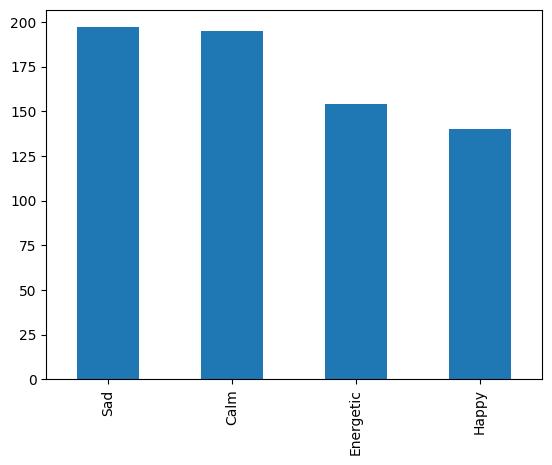

In [8]:
df['mood'].value_counts().plot.bar()

In [10]:
df = df[['name','album','popularity','mood','id']]
df['history'] = 0

In [107]:
play = df[df['mood'] == 'Calm']
play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
play = play[:10].reset_index(drop=True)
display(play)

,name,album,popularity,mood,id,history
0,Lost,Lost,64,Calm,7nC2EOpMnpDT2DkvniimSm,0
1,Curiosity,Curiosity,60,Calm,3WEdWvAScE1EcBfErseQnC,0
2,Escaping Time,Floating,60,Calm,7JrSIPcfkWhDzxWII8Jz7V,0
3,Just Look at You,432 Water Crystals,59,Calm,62X7ld1sa8RHl4zRtSvfHf,0
4,Mil Sonidos,Mil Sonidos,59,Calm,11oVQ68B4PnVQHIY6svpXg,0
5,The Choice,The Last of Us,59,Calm,2IXJyG1DX93g2EhFXghz37,0
6,Vague,Envision,59,Calm,3IOXceWmoCrTyl5TXFDzWu,0
7,What You Love You Must Love Now,Everywhere And Right Here,59,Calm,3L0fPX8biELkH57fF3Exkd,0
8,alpha waves,alpha waves,59,Calm,5ZCW5CDwhfXJGL2MzxGwhx,0
9,Coda,Endeavour,58,Calm,2TFQPFUqRtgj1auq9b5PlR,0


In [108]:
song_name = input("Enter name of song: ")
play.loc[play['name'] == song_name, 'history'] += 1
play

Enter name of song: 


,name,album,popularity,mood,id,history
0,Lost,Lost,64,Calm,7nC2EOpMnpDT2DkvniimSm,0
1,Curiosity,Curiosity,60,Calm,3WEdWvAScE1EcBfErseQnC,0
2,Escaping Time,Floating,60,Calm,7JrSIPcfkWhDzxWII8Jz7V,0
3,Just Look at You,432 Water Crystals,59,Calm,62X7ld1sa8RHl4zRtSvfHf,0
4,Mil Sonidos,Mil Sonidos,59,Calm,11oVQ68B4PnVQHIY6svpXg,0
5,The Choice,The Last of Us,59,Calm,2IXJyG1DX93g2EhFXghz37,0
6,Vague,Envision,59,Calm,3IOXceWmoCrTyl5TXFDzWu,0
7,What You Love You Must Love Now,Everywhere And Right Here,59,Calm,3L0fPX8biELkH57fF3Exkd,0
8,alpha waves,alpha waves,59,Calm,5ZCW5CDwhfXJGL2MzxGwhx,0
9,Coda,Endeavour,58,Calm,2TFQPFUqRtgj1auq9b5PlR,0


In [109]:
play = play.sort_values(by=['history', 'popularity'], ascending=[True, False])
play = play[:5].reset_index(drop=True)
play

,name,album,popularity,mood,id,history
0,Lost,Lost,64,Calm,7nC2EOpMnpDT2DkvniimSm,0
1,Curiosity,Curiosity,60,Calm,3WEdWvAScE1EcBfErseQnC,0
2,Escaping Time,Floating,60,Calm,7JrSIPcfkWhDzxWII8Jz7V,0
3,Just Look at You,432 Water Crystals,59,Calm,62X7ld1sa8RHl4zRtSvfHf,0
4,Mil Sonidos,Mil Sonidos,59,Calm,11oVQ68B4PnVQHIY6svpXg,0


In [11]:
# Making song recommendations based on predicted class

def recommend_songs(pred_class, df):
    
    if(pred_class == 'Disgust'):
        play = df[df['mood'] == 'Sad']
        play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         play = play[:5].reset_index(drop=True)
        play = play.reset_index(drop=True)
        
        
    if(pred_class == 'Happy' or pred_class=='Sad'):
        play = df[df['mood'] == 'Happy']
        play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         play = play[:5].reset_index(drop=True)
        play = play.reset_index(drop=True)
#         display(play)
        
        
    if(pred_class == 'Fear' or pred_class=='Angry'):
        play = df[df['mood'] == 'Calm']
        play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         play = play[:5].reset_index(drop=True)
        play = play.reset_index(drop=True)
#         display(play)
        
        
    if(pred_class == 'Surprise' or pred_class == 'Neutral'):
        play = df[df['mood'] == 'Energetic']
        play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         play = play[:5].reset_index(drop=True)
        play = play.reset_index(drop=True)
#         display(play)
        
    return play

In [18]:
detect_emotion = 'Happy' # get it from the model
playlist = recommend_songs(detect_emotion, df)


while True:
    print("Hello " + user_name['display_name'])
    print("0 - to exit console")
    print("1 - Search for song")
    
    user_input = input("\nEnter choice: ")
    
    if user_input == '1':
        
#         search_song = input("Enter song name: ")
#         playlist = playlist.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         print(playlist['name'])
#         print(playlist[['name','history']][:5].reset_index(drop=True))        
        
        playlist = playlist.sort_values(by=['history','popularity'], ascending=[True,False])
        print(playlist[['name','history','mood']][:5])

        
        inp = int(input("\nEnter song index: "))
        song = playlist.loc[inp]['name']
        search_song = song
        
        print(f"\nPlaying {song} ....\n")
        playlist.loc[playlist['name'] == song, 'history'] += 1
        
        results = spotifyObject.search(search_song, 1, 0, "track")
        songs_dict = results["tracks"]
        song_items = songs_dict['items']
        
        song = song_items[0]['external_urls']['spotify']
        
        webbrowser.open(song)
        
        print("\nSong has opened in the browser\n")
        
    elif user_input == '0':
        print("\nThank you!!")
        break
    else:
        print("\nEnter valid input\n")
        continue

Hello dc
0 - to exit console
1 - Search for song

Enter choice: 1
                                   name  history   mood
0                                Africa        0  Happy
1                       Pumped Up Kicks        0  Happy
2                            Take on Me        0  Happy
3  Here Comes The Sun - Remastered 2009        0  Happy
4                       Highway to Hell        0  Happy

Playing Happy ....


Song has opened in the browser

Hello dc
0 - to exit console
1 - Search for song

Enter choice: 1
                                   name  history   mood
0                                Africa        0  Happy
1                       Pumped Up Kicks        0  Happy
2                            Take on Me        0  Happy
3  Here Comes The Sun - Remastered 2009        0  Happy
4                       Highway to Hell        0  Happy

Playing Happy ....


Song has opened in the browser

Hello dc
0 - to exit console
1 - Search for song

Enter choice: 1
                      

# Runner Code

In [ ]:
#### import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import webbrowser
import spotipy

username = 'dc'
clientID = 'c864248e70f64c5babd0dfcee327b6c8'
clientSecret = 'f671d302d7524ab980d22ddfe087df54'
redirect_url = 'http://google.com/callback/'

oauth_object = spotipy.SpotifyOAuth(clientID, clientSecret, redirect_url)
token_dict = oauth_object.get_access_token()
token = token_dict['access_token']

spotifyObject = spotipy.Spotify(auth=token)
user_name = spotifyObject.current_user()

# to print response in usable format
print(json.dumps(user_name, sort_keys=True, indent=4))

df = pd.read_csv("data/data_moods.csv")

df = df[['name','album','popularity','mood','id']]
df['history'] = 0

# Making song recommendations based on predicted class

def recommend_songs(pred_class, df):
    
    if(pred_class == 'Disgust'):
        play = df[df['mood'] == 'Sad']
        play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         play = play[:5].reset_index(drop=True)
        play = play.reset_index(drop=True)
        
        
    if(pred_class == 'Happy' or pred_class=='Sad'):
        play = df[df['mood'] == 'Happy']
        play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         play = play[:5].reset_index(drop=True)
        play = play.reset_index(drop=True)
#         display(play)
        
        
    if(pred_class == 'Fear' or pred_class=='Angry'):
        play = df[df['mood'] == 'Calm']
        play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         play = play[:5].reset_index(drop=True)
        play = play.reset_index(drop=True)
#         display(play)
        
        
    if(pred_class == 'Surprise' or pred_class == 'Neutral'):
        play = df[df['mood'] == 'Energetic']
        play = play.sort_values(by=['popularity', 'history'], ascending=[False, True])
#         play = play[:5].reset_index(drop=True)
        play = play.reset_index(drop=True)
#         display(play)
        
    return play



detect_emotion = 'Sad' # get it from the model
playlist = recommend_songs(detect_emotion, df)
i = 0


while True:
    print("Hello " + user_name['display_name'])
    print("0 - to exit console")
    print("1 - Get recommendation for song")
    print("2 - Play a song autonomously")
    user_input = int(input("\nEnter choice: "))
#_______________________________________________________________________________________________________________
            
    if user_input == 0:
        print("\nThank you!!")
        break
        
    elif user_input == 1:
        playlist = playlist.sort_values(by=['history','popularity'], ascending=[True,False])
        print(playlist[['name','history','mood']][:5])
        inp = int(input("\nEnter song index: "))
        song = playlist.loc[inp]['name']
        playlist = playlist.reset_index(drop=True)
            
    elif user_input == 2:    
        playlist = playlist.sort_values(by=['history','popularity'], ascending=[True,False])
        song = playlist.loc[i][0]
        playlist = playlist.reset_index(drop=True)

    elif user_input not in [0,1,2]:
        print("\nEnter valid input plz: \n")
        continue
        
  
    search_song = song
    print(f"\nPlaying {song} ....\n")
    playlist.loc[playlist['name'] == song, 'history'] += 1

    results = spotifyObject.search(search_song, 1, 0, "track")
    songs_dict = results["tracks"]
    song_items = songs_dict['items']
    i += 1
    
    song = song_items[0]['external_urls']['spotify']
    webbrowser.open(song)
    print("\nSong has opened in the browser\n")
